In [102]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [103]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [104]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [105]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [106]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.4, random_state=101)

In [107]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.15, random_state=101)

In [108]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [109]:
model = Sequential()      
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [110]:

cnn = model.fit(xtrain, ytrain,validation_data=(xtest, ytest), batch_size=32,epochs=2000)

Epoch 1/2000
6/6 [==============================] - 3s 149ms/step - loss: 6004.7176 - accuracy: 0.5252 - f1_score: 0.1820 - precision_7: 0.1967 - recall_7: 0.3264 - val_loss: 1793.3710 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_7: 0.2969 - val_recall_7: 0.2347
Epoch 2/2000
6/6 [==============================] - 0s 11ms/step - loss: 2126.7081 - accuracy: 0.5851 - f1_score: 0.1857 - precision_7: 0.3113 - recall_7: 0.2378 - val_loss: 1373.9335 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_7: 0.3313 - val_recall_7: 0.3111
Epoch 3/2000
6/6 [==============================] - 0s 11ms/step - loss: 1798.6603 - accuracy: 0.6310 - f1_score: 0.0639 - precision_7: 0.3325 - recall_7: 0.2690 - val_loss: 327.7231 - val_accuracy: 0.7255 - val_f1_score: 0.0000e+00 - val_precision_7: 0.3365 - val_recall_7: 0.2736
Epoch 4/2000
6/6 [==============================] - 0s 13ms/step - loss: 468.1553 - accuracy: 0.6114 - f1_score: 0.0988 - precision_7: 0.3375 - recall_

In [111]:
prediction=(model.predict(xpred) > 0.5).astype("int32")

In [112]:
prediction

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]], dtype=int32)

In [113]:
ypred

269    0
178    0
48     1
41     1
172    0
280    0
289    0
298    0
230    1
124    1
177    0
295    0
69     1
56     0
4      1
85     0
90     0
72     1
Name: DEATH_EVENT, dtype: int64

In [114]:
 score = model.evaluate(xpred,  ypred, verbose=2)

print('\nEvaluation:', score)


1/1 - 0s - loss: 0.6391 - accuracy: 0.7778 - f1_score: 0.7143 - precision_7: 0.7215 - recall_7: 0.6940

Evaluation: [0.6391175985336304, 0.7777777910232544, 0.7142856121063232, 0.7214565277099609, 0.6939895749092102]


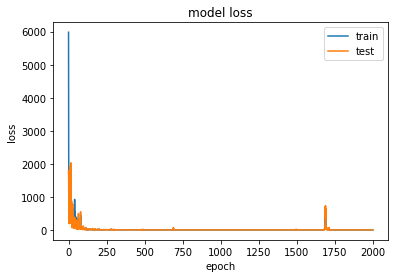

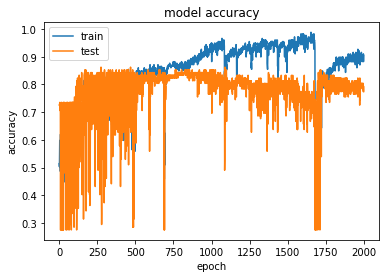

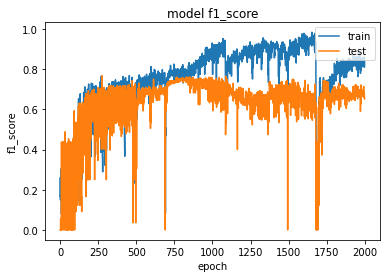

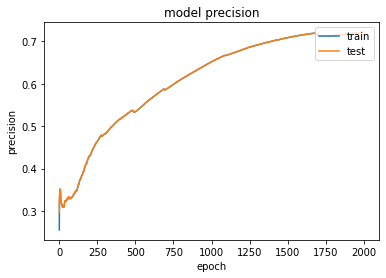

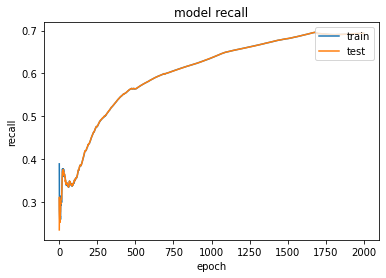

In [116]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(cnn.history['f1_score'])
plt.plot(cnn.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(cnn.history['precision_7'])
plt.plot(cnn.history['val_precision_7'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(cnn.history['recall_7'])
plt.plot(cnn.history['val_recall_7'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


